# Python program for EC, TH, Cl, Ca and Na

Index:
- [Importing various necessary libraries and reading the file](#0.)
- [Fitting linear regression for EC](#1.)
- [Fitting logistic regression for TH](#2.)
- [Fitting logistic regression for Cl](#3.)
- [Fitting logistic regression for Ca](#4.)
- [Fitting logistic regression for Na](#5.)
- [Testing on sample data](#6.)
- [Extra - Correlation plot](#7.)

Instructions (Please read it before you proceed):
- Before starting make sure you have Excel file in the same folder of this file. 
- The first two lines in the original Excel files are removed, please do that too in your system if you are not using my file.
- If you are running the cells in this file for the first time then it is necessary to run all the cells first. However, when you plot the graph in any cell, please do not forget to click on the stop plotting button. No automatic feture has been set, you will have to stop the plotting manually from the button on the top right corner of each graph. If you do not know how to stop the plotting with the button then please do not run those cells with graph in the output.
- In the index, [Importing various necessary libraries and reading the file](#0.) section is the first essential step that you need to do.
- Section 1-5 are training section and those need to run manually; once only when you first open this file. Thus, training has to be performed everytime you open this file for the first time. You do not need to run these 1-5 sections and even importing libraries section when you reach to the [Testing on sample data](#6.) step. Computer RAM will store all the training for you. 
- [Testing on sample data](#6.) is the section when you will test your models on the sample (or unseen data). Look at the first cell under [Testing on sample data](#6.) section, you just need to plug-in your **pH** and **TDS** values in that cell, in terms of floating point number. After doing this just run the cell in the same section without any modification. You will see results for EC, TH, Cl, Ca and Na in the output of each cell. Should you need to change **pH** and **TDS** values for the sample (test) data, you need to repeat the insturction in this point.
- [Extra - Correlation plot](#7.) is an extra section which shows correlation plot for all the features that we used so far. Please note that **TDS** and **EC** are having almost similar trend and hence they get the highest correlation of **1.0**. Thus, they are not shown in the plot.

# <a id='0.'>Importing necessary libraries and packages; Reading the data from excel file</a>

In [1]:
%matplotlib notebook
import pandas as pd
from pandas import ExcelFile
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import seaborn as sns

In [3]:
df = pd.read_excel('parameter data.xlsx', sheet_name='Table 1')
df.head()

,SN,Well I D,District,Taluka,Location,Type,pH,EC,TDS,CO3,...,SO4,F,Alk,Ca,Mg,TH,Na,K,SAR,Arsenic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uS/cm,mg/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ug/L
1,1.0,W220900071533001,Ahmedabad,BARWALA,Barvala,Dug Well,7.84,5440,3645,0.0,...,407.0,4.50,1050.0,80.0,144.0,800.0,863.0,2.0,13.27,6
2,2.0,W230200072264501,Ahmedabad,DASKROI,Ghuma,Dug Well,8.18,3796,2543,0.0,...,270.0,0.61,490.0,140.0,120.0,850.0,318.0,320.0,4.74,1
3,3.0,W222230071591001,Ahmedabad,DHANDHUKA,Dhandhuka1,Dug Well,8.28,385,258,0.0,...,36.0,0.35,140.0,36.0,19.0,170.0,14.0,1.9,0.47,2
4,4.0,W222130072100001,Ahmedabad,DHANDHUKA,Gamph,Dug Well,7.99,4185,2804,0.0,...,84.0,0.96,410.0,80.0,144.0,800.0,543.0,47.0,8.35,6


In [4]:
normalized_df_pH = (df['pH'][1:]-df['pH'][1:].mean())/df['pH'][1:].std()
print (df['pH'][1:].mean())
print (df['pH'][1:].std())

8.085351170568575
0.24688368013001635


In [5]:
normalized_df_TDS = (df['TDS'][1:]-df['TDS'][1:].mean())/df['TDS'][1:].std()
print (df['TDS'][1:].mean())
print (df['TDS'][1:].std())

1391.591973244147
1570.0894939986524


# <a id='1.'>1. Fitting linear regression for EC</a>
- Make sure all the data are normalized. We use two feature vectors for calculating EC: (1) pH and (2) TDS. At the end of the every prediction section (for example, at the end of this section), we will be using 2D graphs for illustration purpose to see the trend in the data.
- EC is a continuous variable (i.e. value of EC falls between some continuous range of numbers. Thus, the prediction of EC is carried out by fitting a linear regression (or in more specific words, ridge regression) on two fetures, namely pH and TDS. 
- pH and TDS are also normalized fetures. Please see the mean and standard daviation of pH and TDS just above this section.
- If you want to read about Ridge regression, these resources are the best to read through: [Python coding with sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [Ridge regression theory](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

## <a id='1.1'>1.1 Preparing feature vector and ground truth for training</a>

In [7]:
x_data_for_EC = np.concatenate((np.reshape(np.array(normalized_df_pH),(len(normalized_df_pH),1)),np.reshape(np.array(normalized_df_TDS),(len(normalized_df_TDS),1))), axis = 1)
x_data_for_EC.shape

(598, 2)

In [8]:
y_label_for_EC = np.reshape(np.array(df['EC'][1:]),(len(df['EC'][1:]),1))
y_label_for_EC.shape

(598, 1)

## <a id='1.2'>1.2 Ridge-regression - for EC</a>
- As you can see below that the model score is almost ~100% when we fit the regression.
- Just below the score, coefficient of the features are also shown in the console output. From this, one can see that TDS has more weight in predicting EC than the pH value, as the coefficient of TDS is way higher than the pH.

In [91]:
from sklearn import linear_model
clf_ridge = linear_model.Ridge(alpha = 1.0).fit(x_data_for_EC, y_label_for_EC)
print (clf_ridge.score(x_data_for_EC, y_label_for_EC))
print (clf_ridge.coef_)

0.9999970010424873
[[-9.88704163e-01  2.33926425e+03]]


## <a id='1.3'>1.3 (3D and 2D) Plots for the trend</a>
- EC vs pH
- EC vs TDS (a linear trend exists)

<IPython.core.display.Javascript object>


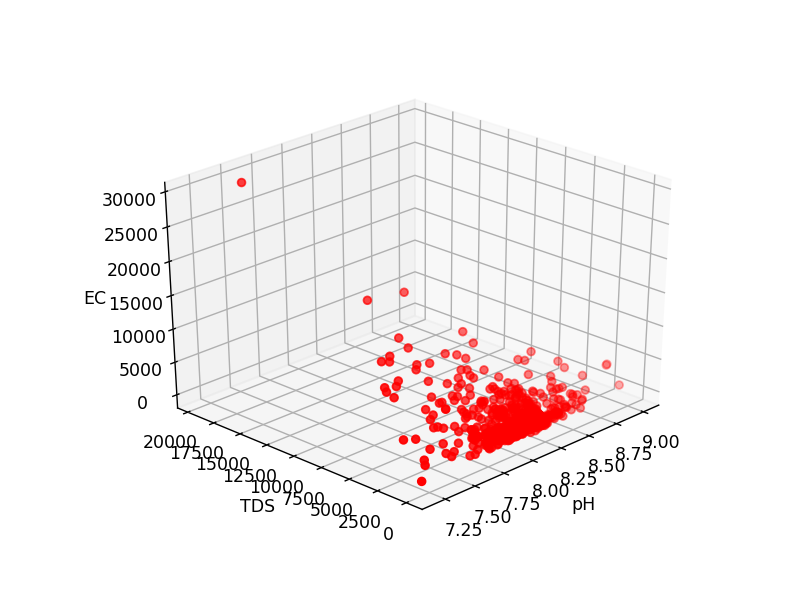

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pH'][1:], df['TDS'][1:], df['EC'][1:], c='r', marker='o')

ax.set_xlabel('pH')
ax.set_ylabel('TDS')
ax.set_zlabel('EC')

plt.show()

<IPython.core.display.Javascript object>


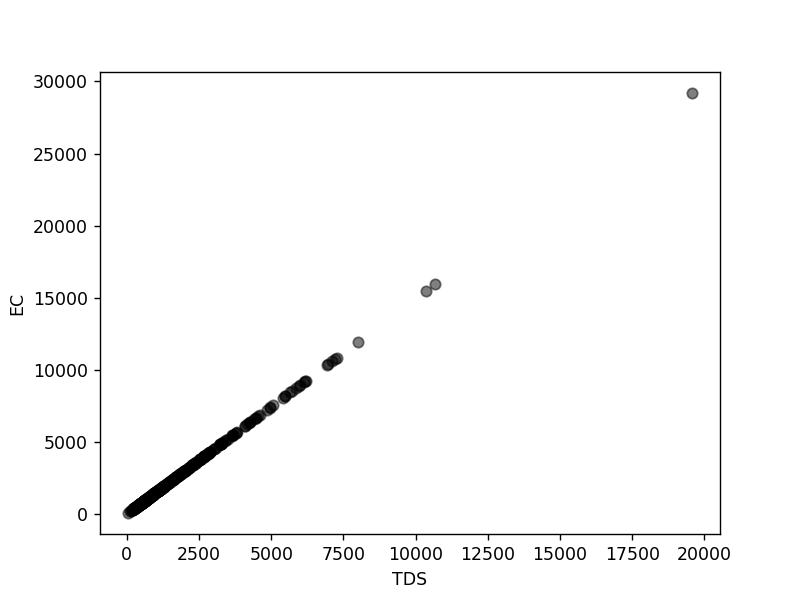

In [147]:
colors = (0,0,0)
plt.scatter(df['TDS'][1:], df['EC'][1:], c=colors, alpha=0.5)
plt.xlabel('TDS')
plt.ylabel('EC')
plt.show()

<IPython.core.display.Javascript object>


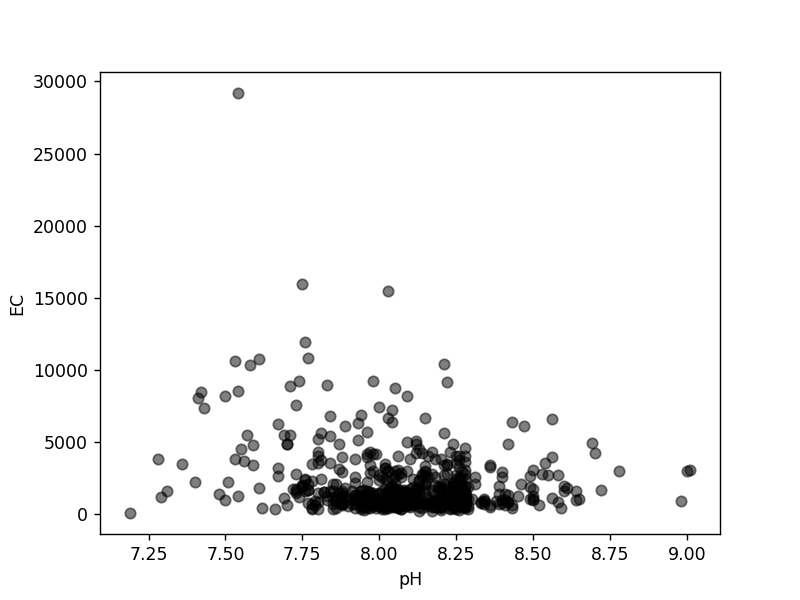

In [148]:
colors = (0,0,0)
plt.scatter(df['pH'][1:], df['EC'][1:], c=colors, alpha=0.5)
plt.xlabel('pH')
plt.ylabel('EC')
plt.show()

- This is the end of the EC prediction from the next section no linear regression will be fit, as we do not need to predict any continuous variable. We will be predicting discrete number for TH, Ca, Cl and Na. Different ranges for water condition are shown in the table below:

| Element | Below | Good | Danger | Unit |
|------|------|------------|------|------|
|   TH  | <100 | >=100 and <=600 | >600 | mg/l|
|   Cl  | <45 | >=45 and <=400 | >400 | mg/l|
|   Ca  | <25 | >=25 and <=200 | >200 | mg/l|
|   Na  | <25 | >=25 and <=200 | >200 | mg/l|

# <a id='2.'>2. Fitting logistic regression to predict the class of TH</a>
- Make sure all the data are normalized. We use three feature vectors for calculating TH: (1) pH, (2) TDS and (3) EC. Please note that we can use pH and TDS (normalized features from the earlier section. For EC, we need to use the linear regression that we fit in the previous section. From that equation, we will calculate EC values and those values will also be normalized before using into the training section (see [2.1 section](#2.1) for data preparation).

## <a id='2.1'>2.1 Preparing feature vector and ground truth for training</a>

In [103]:
predicted_EC = clf_ridge.predict(x_data_for_EC)
permanent_ECmean = predicted_EC.mean()
permanent_ECstd = predicted_EC.std()
print (predicted_EC.mean())
print (predicted_EC.std())
predicted_EC = (predicted_EC - predicted_EC.mean())/predicted_EC.std()

2076.989966555184
2337.5432403341247


In [14]:
x_data_for_TH = np.concatenate((x_data_for_EC,predicted_EC), axis = 1)
x_data_for_TH.shape

(598, 3)

- We will also convert the TH continuous value ground truth to TH discrete value (i.e. three different classes as we mentioned in the table earlier. Please see below, how it is done.

- -1: <100: (Below)
- 0: >=100 and <=600: (Good)
- 1: >=600: (Danger)

In [29]:
y_label_for_TH = np.reshape(np.array(df['TH'][1:]),(len(df['TH'][1:]),1))
y_label_for_TH[np.where(y_label_for_TH < 100)] = -1.0
y_label_for_TH[np.where((y_label_for_TH >= 100) & (y_label_for_TH <= 600))] = 0.0
y_label_for_TH[np.where(y_label_for_TH > 600)] = 1.0

In [30]:
y_label_for_TH.shape

(598, 1)

In [31]:
np.unique(y_label_for_TH)

array([-1.,  0.,  1.])

## <a id='2.2'>2.2 Logistic Regression - for TH</a>
- As you can see below that the model score is almost ~91% when we fit the logistic regression (classification).
- Just below the score, coefficient of the features are also shown in the console output.
- If you want to read more about logistic regression, these are good resources: [Logistic regression - scikit learn pyton](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Theoretical overview Logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [32]:
from sklearn.linear_model import LogisticRegression
clf_logistic_TH = LogisticRegression(penalty='l1').fit(x_data_for_TH, y_label_for_TH)
print (clf_logistic_TH.score(x_data_for_TH, y_label_for_TH))

0.9096989966555183


C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## <a id='2.3'>2.3 (3D and 2D) Plots for the trend - TH</a>
- TH vs pH
- TH vs TDS
- TH vs EC

<IPython.core.display.Javascript object>


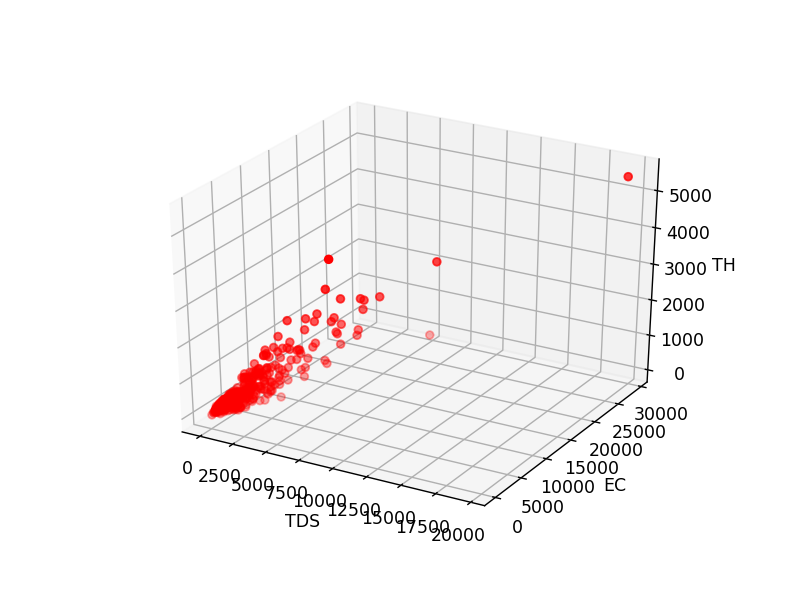

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TDS'][1:], df['EC'][1:], df['TH'][1:], c='r', marker='o')

ax.set_xlabel('TDS')
ax.set_ylabel('EC')
ax.set_zlabel('TH')

plt.show()

<IPython.core.display.Javascript object>


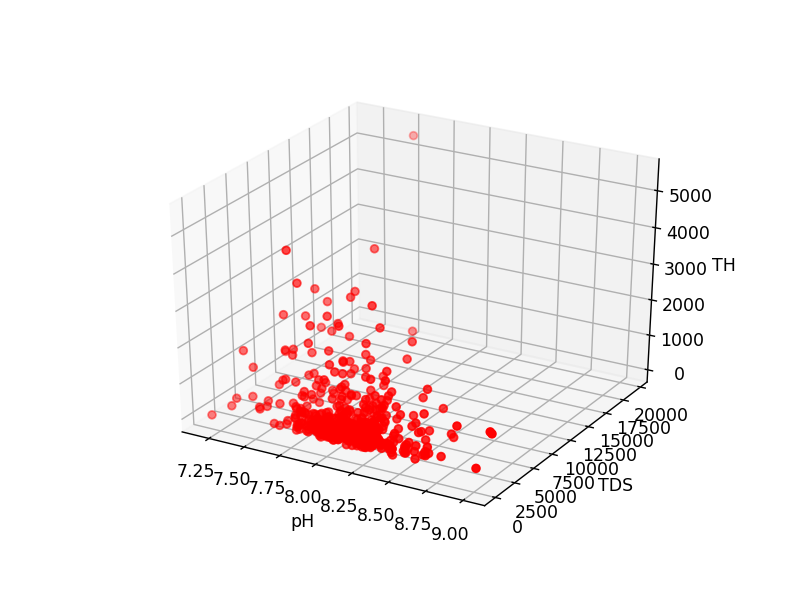

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pH'][1:], df['TDS'][1:], df['TH'][1:], c='r', marker='o')

ax.set_xlabel('pH')
ax.set_ylabel('TDS')
ax.set_zlabel('TH')

plt.show()

<IPython.core.display.Javascript object>


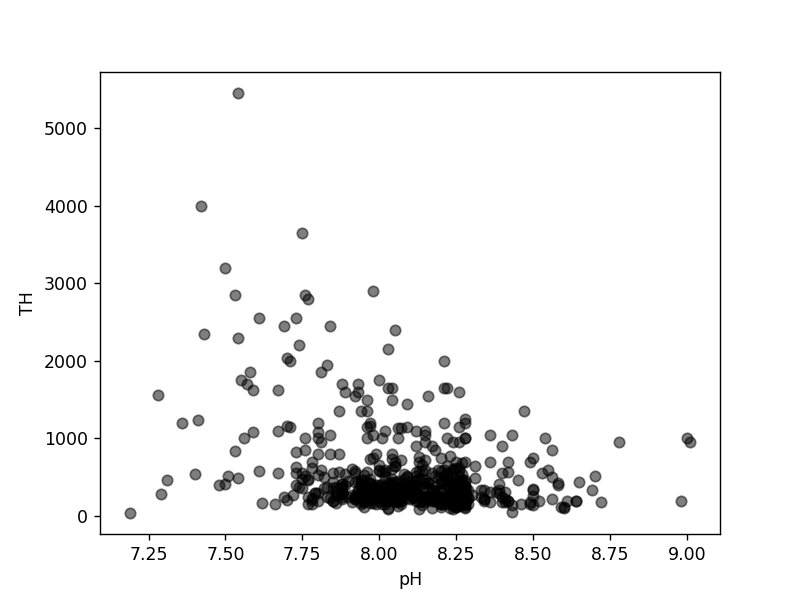

In [149]:
colors = (0,0,0)
plt.scatter(df['pH'][1:], df['TH'][1:], c=colors, alpha=0.5)
plt.xlabel('pH')
plt.ylabel('TH')
plt.show()

<IPython.core.display.Javascript object>


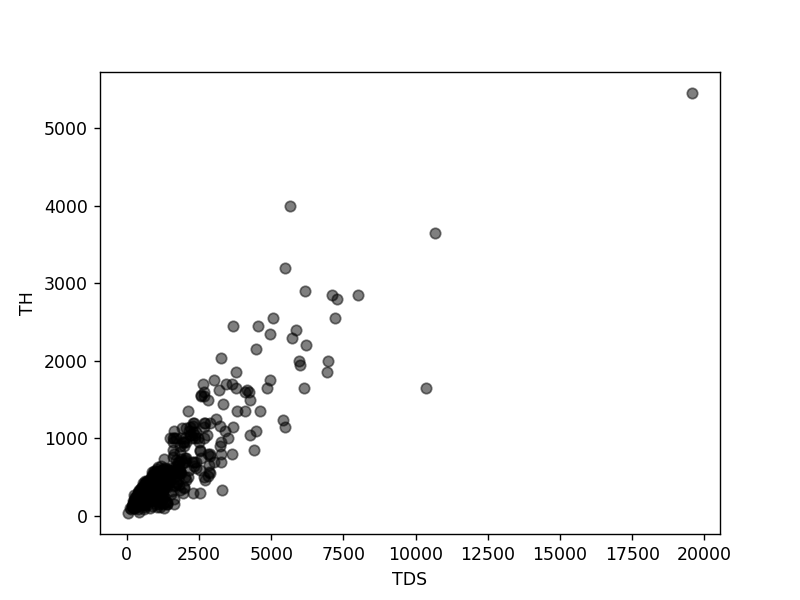

In [151]:
colors = (0,0,0)
plt.scatter(df['TDS'][1:], df['TH'][1:], c=colors, alpha=0.5)
plt.xlabel('TDS')
plt.ylabel('TH')
plt.show()

<IPython.core.display.Javascript object>


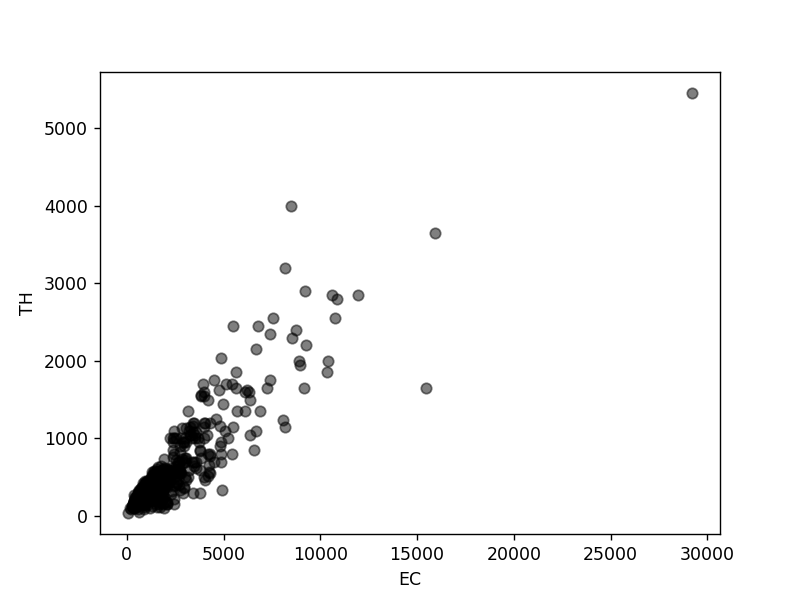

In [150]:
colors = (0,0,0)
plt.scatter(df['EC'][1:], df['TH'][1:], c=colors, alpha=0.5)
plt.xlabel('EC')
plt.ylabel('TH')
plt.show()

# <a id='3.'>3. Fitting logistic regression to predict the class of Cl</a>
- Make sure all the data are normalized. We use four feature vectors for calculating Cl: (1) pH, (2) TDS, (3) EC and (4) TH. Please note that we can use pH and TDS (normalized features from the earlier section. For EC, we need to use the linear regression that we fit in the first section. From that equation, we will calculate EC values and those values will also be normalized before training. 
- For TH values, we will use logistic regression in the previous section to predict the value (that value will be in -1, 0 or +1). We do not need to normalize these TH values, as they are already in a good distribution. 
- Cl ground truth data should also be converted into the discrete classes before training.

## <a id='3.1'>3.1 Preparing feature vector and ground truth for training for Cl</a>

In [93]:
predicted_EC = clf_ridge.predict(x_data_for_EC)
print (predicted_EC.mean())
print (predicted_EC.std())
predicted_EC = (predicted_EC - predicted_EC.mean())/predicted_EC.std()

2076.989966555184
2337.5432403341247


In [27]:
predicted_TH = clf_logistic_TH.predict(x_data_for_TH)
predicted_TH.shape

(598,)

In [28]:
x_data_for_CL = np.concatenate((x_data_for_TH,np.reshape(predicted_TH,(predicted_TH.shape[0],1))), axis = 1)
x_data_for_CL.shape

(598, 4)

- We will also convert the Cl continuous value ground truth to Cl discrete value (i.e. three different classes as we mentioned in the table earlier. Please see below, how it is done.

- -1: <45: (Below)
- 0: >=45 and <=400: (Good)
- 1: >=400: (Danger)

In [46]:
y_label_for_CL = np.reshape(np.array(df['Cl'][1:]),(len(df['Cl'][1:]),1))
y_label_for_CL[np.where(y_label_for_CL < 45)] = -1.0
y_label_for_CL[np.where((y_label_for_CL >= 45) & (y_label_for_CL <= 400))] = 0.0
y_label_for_CL[np.where(y_label_for_CL > 400)] = 1.0

In [47]:
y_label_for_CL.shape

(598, 1)

In [48]:
np.unique(y_label_for_CL)

array([-1.,  0.,  1.])

## <a id='3.2'>3.2 Logistic Regression - for Cl</a>
- As you can see below that the model score is almost ~87% when we fit the logistic regression (classification).
- Just below the score, coefficient of the features are also shown in the console output.
- If you want to read more about logistic regression, these are good resources: [Logistic regression - scikit learn pyton](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Theoretical overview Logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [49]:
from sklearn.linear_model import LogisticRegression
clf_logistic_CL = LogisticRegression(penalty='l1').fit(x_data_for_CL, y_label_for_CL)
print (clf_logistic_CL.score(x_data_for_CL, y_label_for_CL))

0.8712374581939799


C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## <a id='3.3'>3.3 (3D and 2D) Plots for the trend - Cl</a>
- Cl vs pH
- Cl vs TDS
- Cl vs EC
- Cl vs TH

<IPython.core.display.Javascript object>


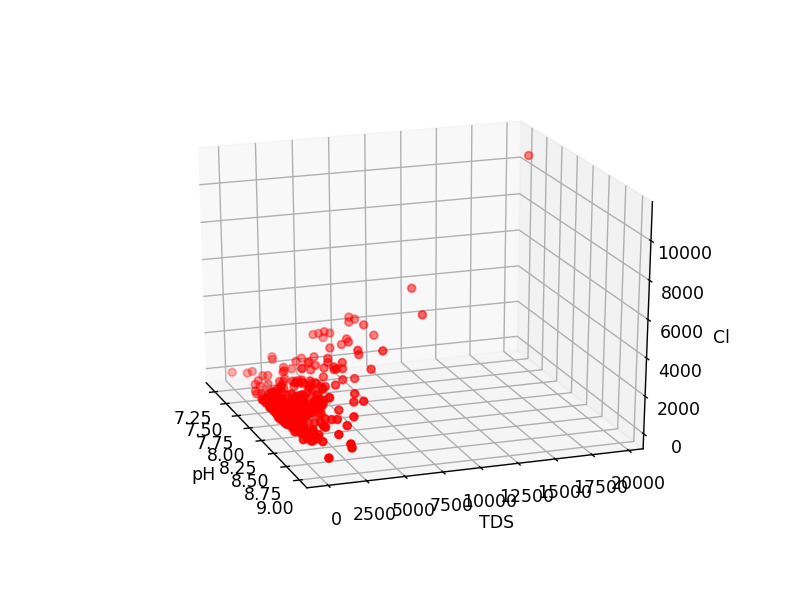

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pH'][1:], df['TDS'][1:], df['Cl'][1:], c='r', marker='o')

ax.set_xlabel('pH')
ax.set_ylabel('TDS')
ax.set_zlabel('Cl')

plt.show()

<IPython.core.display.Javascript object>


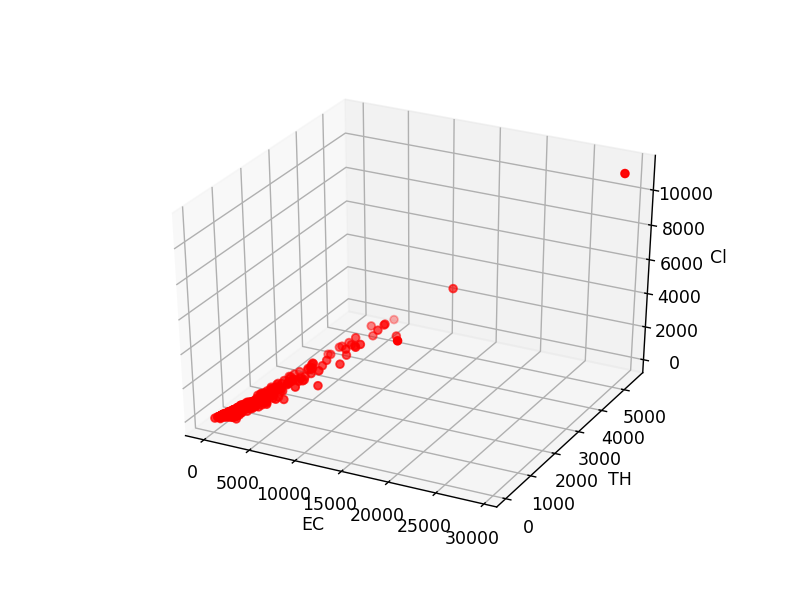

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['EC'][1:], df['TH'][1:], df['Cl'][1:], c='r', marker='o')

ax.set_xlabel('EC')
ax.set_ylabel('TH')
ax.set_zlabel('Cl')

plt.show()

<IPython.core.display.Javascript object>


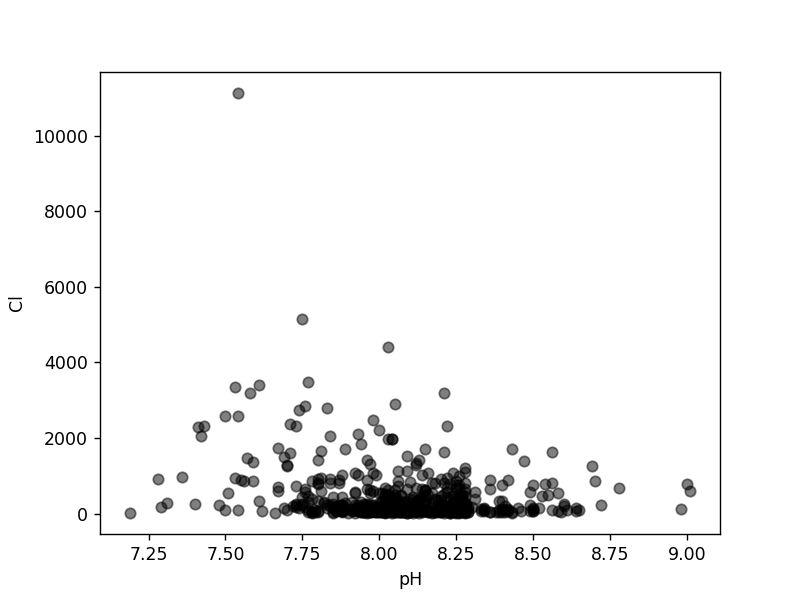

In [152]:
colors = (0,0,0)
plt.scatter(df['pH'][1:], df['Cl'][1:], c=colors, alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Cl')
plt.show()

<IPython.core.display.Javascript object>


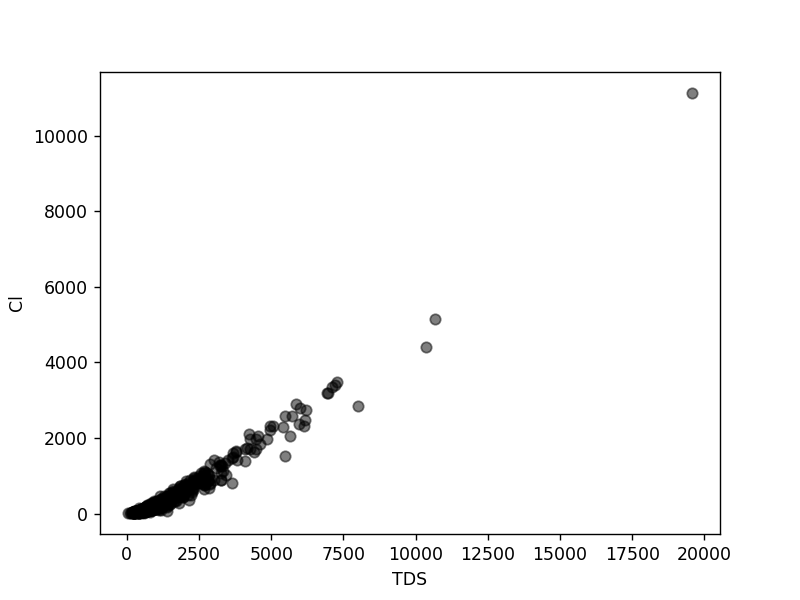

In [153]:
colors = (0,0,0)
plt.scatter(df['TDS'][1:], df['Cl'][1:], c=colors, alpha=0.5)
plt.xlabel('TDS')
plt.ylabel('Cl')
plt.show()

<IPython.core.display.Javascript object>


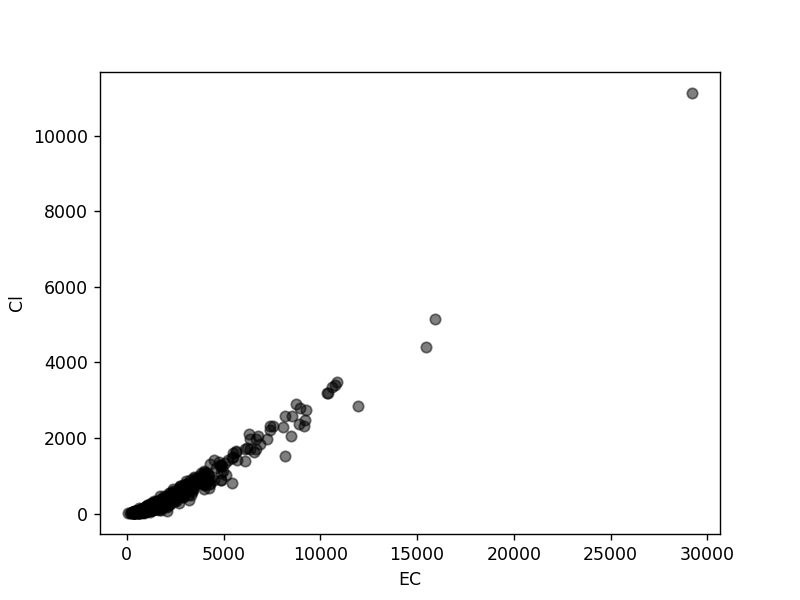

In [154]:
colors = (0,0,0)
plt.scatter(df['EC'][1:], df['Cl'][1:], c=colors, alpha=0.5)
plt.xlabel('EC')
plt.ylabel('Cl')
plt.show()

<IPython.core.display.Javascript object>


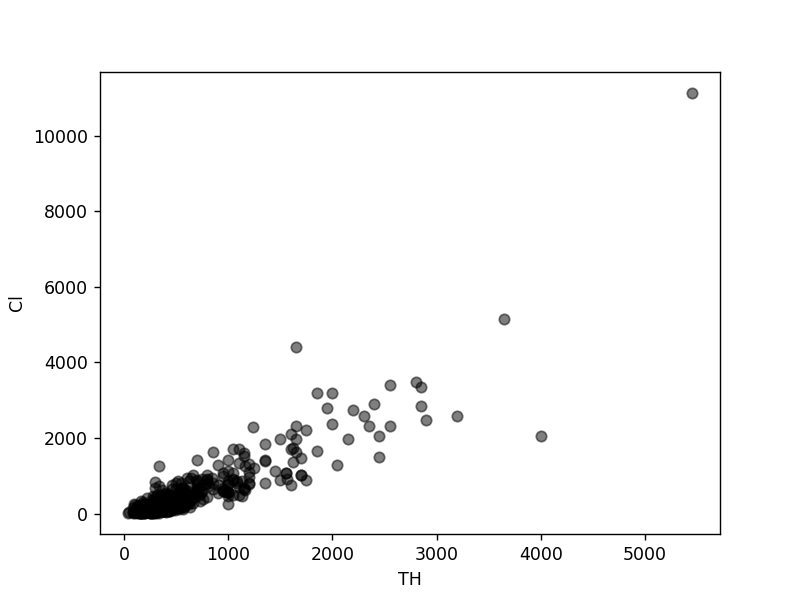

In [155]:
colors = (0,0,0)
plt.scatter(df['TH'][1:], df['Cl'][1:], c=colors, alpha=0.5)
plt.xlabel('TH')
plt.ylabel('Cl')
plt.show()

# <a id='4.'>4. Fitting logistic regression to predict the class of Ca</a>
- Make sure all the data are normalized. We use four feature vectors for calculating Ca: (1) pH, (2) TDS, (3) EC, (4) TH and (5) Cl. Please note that we can use pH and TDS (normalized features from the earlier section. For EC, we need to use the linear regression that we fit in the first section. From that equation, we will calculate EC values and those values will also be normalized before training. 
- For TH values, we will use logistic regression in the second section to predict the value (that value will be in -1, 0 or +1). We do not need to normalize these TH values, as they are already in a good distribution. 
- For Cl values, we will use logistic regression in the previous section to predict the value (that value will be in -1, 0 or +1). We do not need to normalize these Cl values, as they are already in a good distribution. 
- Ca ground truth data should also be converted into the discrete classes before training.

## <a id='4.1'>4.1 Preparing feature vector and ground truth for training for Ca</a>

In [50]:
predicted_EC = clf_ridge.predict(x_data_for_EC)
print (predicted_EC.mean())
print (predicted_EC.std())
predicted_EC = (predicted_EC - predicted_EC.mean())/predicted_EC.std()

2076.989966555184
2337.5432403341247


In [51]:
predicted_TH = clf_logistic_TH.predict(x_data_for_TH)
predicted_TH.shape

(598,)

In [52]:
predicted_CL = clf_logistic_CL.predict(x_data_for_CL)
predicted_CL.shape

(598,)

In [53]:
x_data_for_CA = np.concatenate((x_data_for_CL,np.reshape(predicted_CL,(predicted_CL.shape[0],1))), axis = 1)
x_data_for_CA.shape

(598, 5)

- We will also convert the Ca continuous value ground truth to Ca discrete value (i.e. three different classes as we mentioned in the table earlier. Please see below, how it is done.

- -1: <25: (Below)
- 0: >=25 and <=200: (Good)
- 1: >=200: (Danger)

In [54]:
y_label_for_CA = np.reshape(np.array(df['Ca'][1:]),(len(df['Ca'][1:]),1))
y_label_for_CA[np.where(y_label_for_CA < 25)] = -1.0
y_label_for_CA[np.where((y_label_for_CA >= 25) & (y_label_for_CA <= 200))] = 0.0
y_label_for_CA[np.where(y_label_for_CA > 200)] = 1.0

In [55]:
y_label_for_CA.shape

(598, 1)

In [56]:
np.unique(y_label_for_CA)

array([-1.,  0.,  1.])

## <a id='4.2'>4.2 Logistic Regression - for Ca</a>
- As you can see below that the model score is almost ~88% when we fit the logistic regression (classification).
- Just below the score, coefficient of the features are also shown in the console output.
- If you want to read more about logistic regression, these are good resources: [Logistic regression - scikit learn pyton](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Theoretical overview Logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [57]:
from sklearn.linear_model import LogisticRegression
clf_logistic_CA = LogisticRegression(penalty='l1').fit(x_data_for_CA, y_label_for_CA)
print (clf_logistic_CA.score(x_data_for_CA, y_label_for_CA))

0.8762541806020067


C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## <a id='4.3'>4.3 (3D and 2D) Plots for the trend - Ca</a>
- Ca vs pH
- Ca vs TDS
- Ca vs EC
- Ca vs TH
- Ca vs Cl

<IPython.core.display.Javascript object>


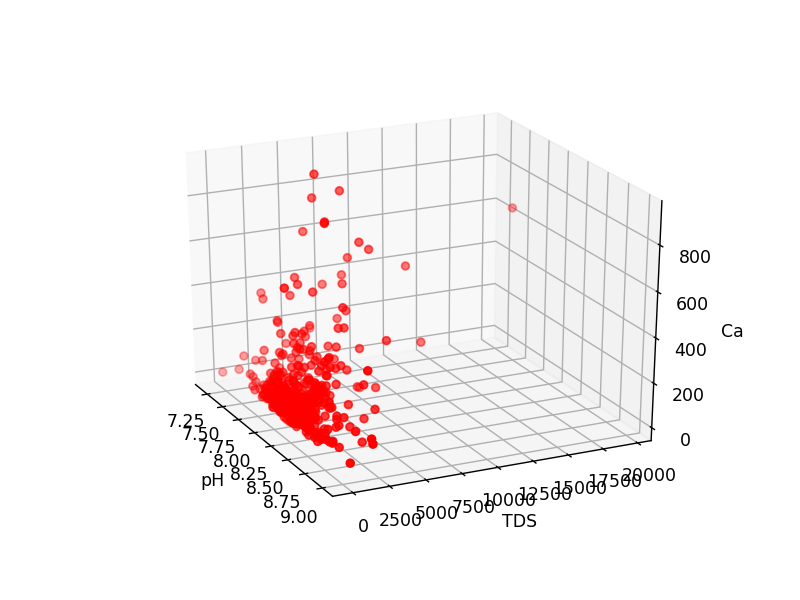

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['pH'][1:], df['TDS'][1:], df['Ca'][1:], c='r', marker='o')

ax.set_xlabel('pH')
ax.set_ylabel('TDS')
ax.set_zlabel('Ca')

plt.show()

<IPython.core.display.Javascript object>


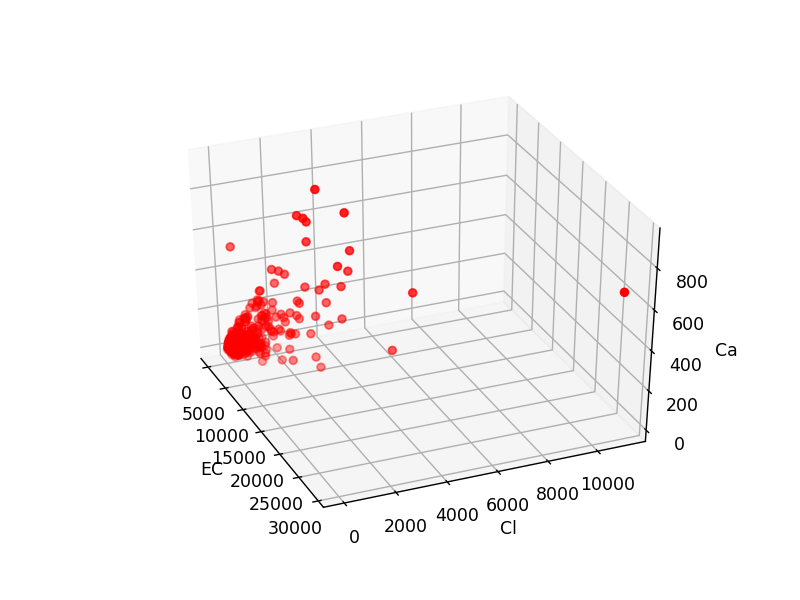

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['EC'][1:], df['Cl'][1:], df['Ca'][1:], c='r', marker='o')

ax.set_xlabel('EC')
ax.set_ylabel('Cl')
ax.set_zlabel('Ca')

plt.show()

<IPython.core.display.Javascript object>


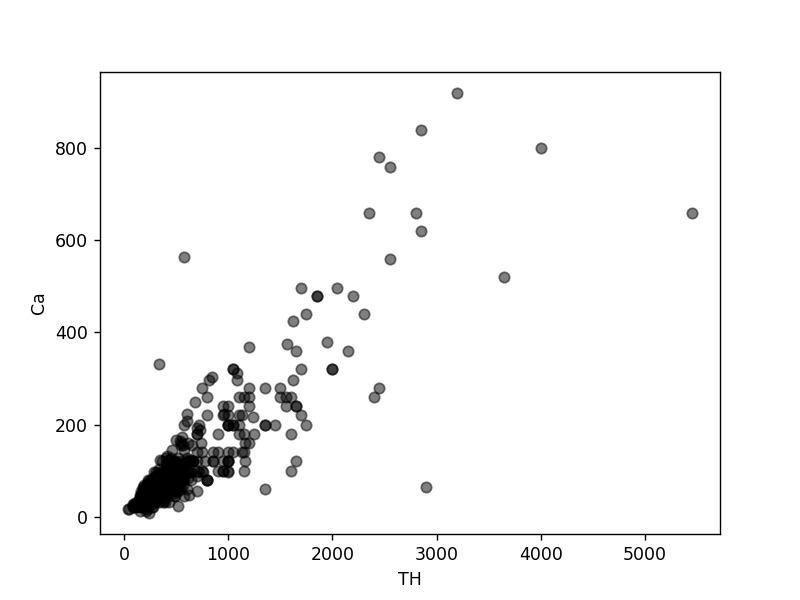

In [61]:
colors = (0,0,0)
plt.scatter(df['TH'][1:], df['Ca'][1:], c=colors, alpha=0.5)
plt.xlabel('TH')
plt.ylabel('Ca')
plt.show()

<IPython.core.display.Javascript object>


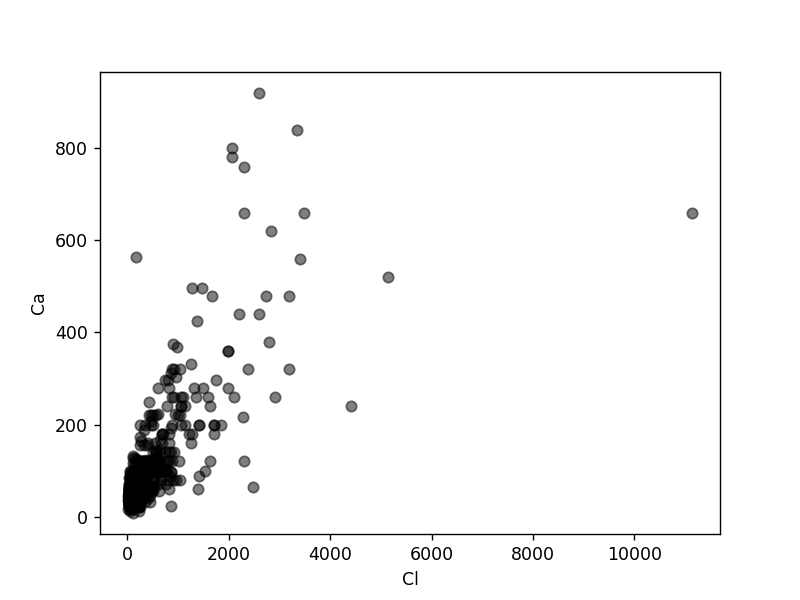

In [62]:
colors = (0,0,0)
plt.scatter(df['Cl'][1:], df['Ca'][1:], c=colors, alpha=0.5)
plt.xlabel('Cl')
plt.ylabel('Ca')
plt.show()

<IPython.core.display.Javascript object>


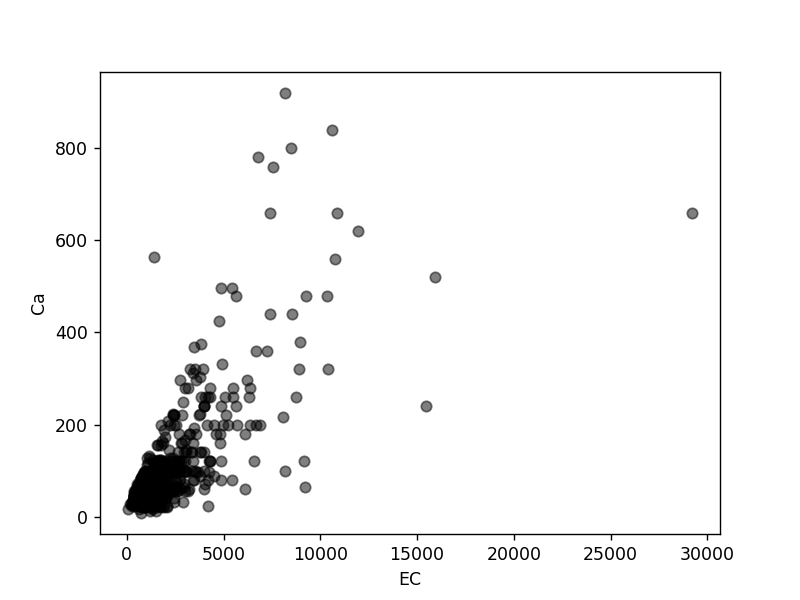

In [65]:
colors = (0,0,0)
plt.scatter(df['EC'][1:], df['Ca'][1:], c=colors, alpha=0.5)
plt.xlabel('EC')
plt.ylabel('Ca')
plt.show()

<IPython.core.display.Javascript object>


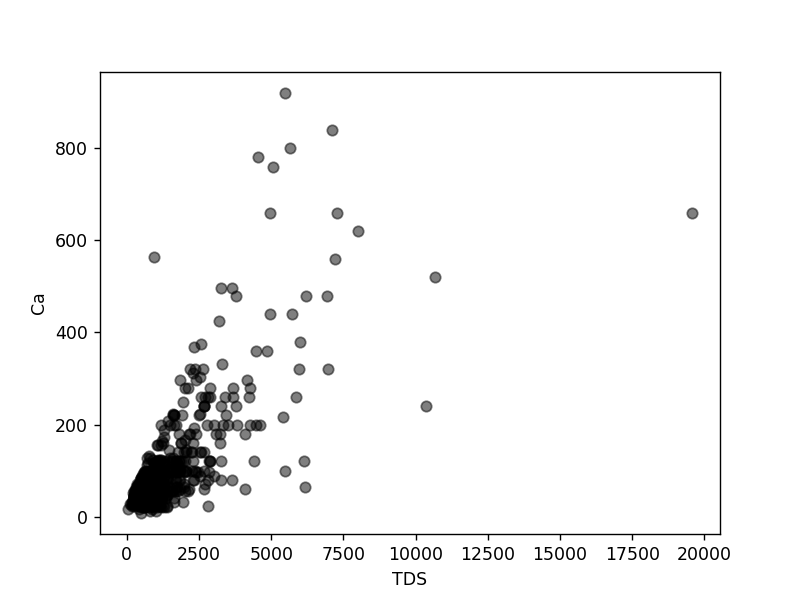

In [66]:
colors = (0,0,0)
plt.scatter(df['TDS'][1:], df['Ca'][1:], c=colors, alpha=0.5)
plt.xlabel('TDS')
plt.ylabel('Ca')
plt.show()

<IPython.core.display.Javascript object>


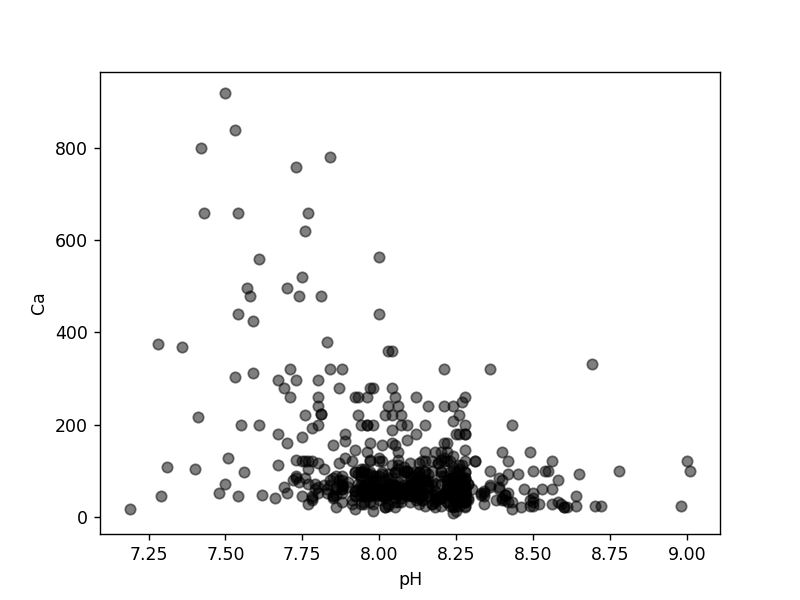

In [67]:
colors = (0,0,0)
plt.scatter(df['pH'][1:], df['Ca'][1:], c=colors, alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Ca')
plt.show()

# <a id='5.'>5. Fitting logistic regression to predict the class of Na</a>
- Make sure all the data are normalized. We use four feature vectors for calculating Na: (1) pH, (2) TDS, (3) EC, (4) TH, (5) Cl and (6) Ca. Please note that we can use pH and TDS (normalized features from the earlier section. For EC, we need to use the linear regression that we fit in the first section. From that equation, we will calculate EC values and those values will also be normalized before training. 
- For TH values, we will use logistic regression in the second section to predict the value (that value will be in -1, 0 or +1). We do not need to normalize these TH values, as they are already in a good distribution. 
- For Cl values, we will use logistic regression in the third section to predict the value (that value will be in -1, 0 or +1). We do not need to normalize these Cl values, as they are already in a good distribution.
- For Ca values, we will use logistic regression in the previous section to predict the value (that value will be in -1, 0 or +1). We do not need to normalize these Ca values, as they are already in a good distribution. 
- Na ground truth data should also be converted into the discrete classes before training.

## <a id='5.1'>5.1 Preparing feature vector and ground truth for training for Na</a>

In [58]:
predicted_EC = clf_ridge.predict(x_data_for_EC)
print (predicted_EC.mean())
print (predicted_EC.std())
predicted_EC = (predicted_EC - predicted_EC.mean())/predicted_EC.std()

2076.989966555184
2337.5432403341247


In [59]:
predicted_TH = clf_logistic_TH.predict(x_data_for_TH)
predicted_TH.shape

(598,)

In [61]:
predicted_CL = clf_logistic_CL.predict(x_data_for_CL)
predicted_CL.shape

(598,)

In [62]:
predicted_CA = clf_logistic_CA.predict(x_data_for_CA)
predicted_CA.shape

(598,)

In [63]:
x_data_for_NA = np.concatenate((x_data_for_CA,np.reshape(predicted_CA,(predicted_CA.shape[0],1))), axis = 1)
x_data_for_NA.shape

(598, 6)

- We will also convert the Na continuous value ground truth to Ca discrete value (i.e. three different classes as we mentioned in the table earlier. Please see below, how it is done.

- -1: <25: (Below)
- 0: >=25 and <=200: (Good)
- 1: >=200: (Danger)

In [69]:
y_label_for_NA = np.reshape(np.array(df['Na'][1:]),(len(df['Na'][1:]),1))
y_label_for_NA[np.where(y_label_for_NA < 25)] = -1.0
y_label_for_NA[np.where((y_label_for_NA >= 25) & (y_label_for_NA <= 200))] = 0.0
y_label_for_NA[np.where(y_label_for_NA > 200)] = 1.0

In [70]:
y_label_for_NA.shape

(598, 1)

In [71]:
np.unique(y_label_for_NA)

array([-1.,  0.,  1.])

## <a id='5.2'>5.2 Logistic Regression - for Na</a>
- As you can see below that the model score is almost ~86% when we fit the logistic regression (classification).
- Just below the score, coefficient of the features are also shown in the console output.
- If you want to read more about logistic regression, these are good resources: [Logistic regression - scikit learn pyton](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Theoretical overview Logistic regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [73]:
from sklearn.linear_model import LogisticRegression
clf_logistic_NA = LogisticRegression(penalty='l1').fit(x_data_for_NA, y_label_for_NA)
print (clf_logistic_NA.score(x_data_for_NA, y_label_for_NA))

0.8595317725752508


C:\Users\Maharshi Trivedi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## <a id='5.3'>5.3 (3D and 2D) Plots for the trend - Na</a>
- Na vs pH
- Na vs TDS
- Na vs EC
- Na vs TH
- Na vs Cl
- Na vs Ca

<IPython.core.display.Javascript object>


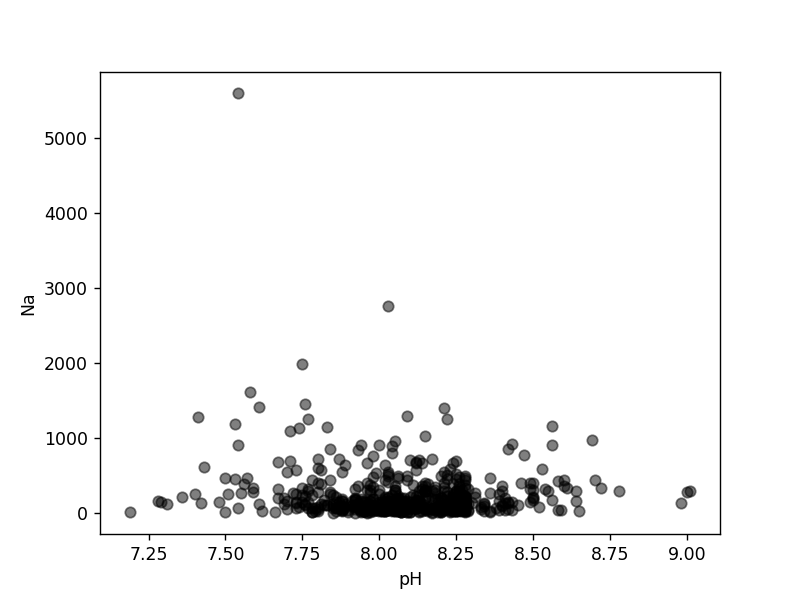

In [114]:
colors = (0,0,0)
plt.scatter(df['pH'][1:], df['Na'][1:], c=colors, alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Na')
plt.show()

<IPython.core.display.Javascript object>


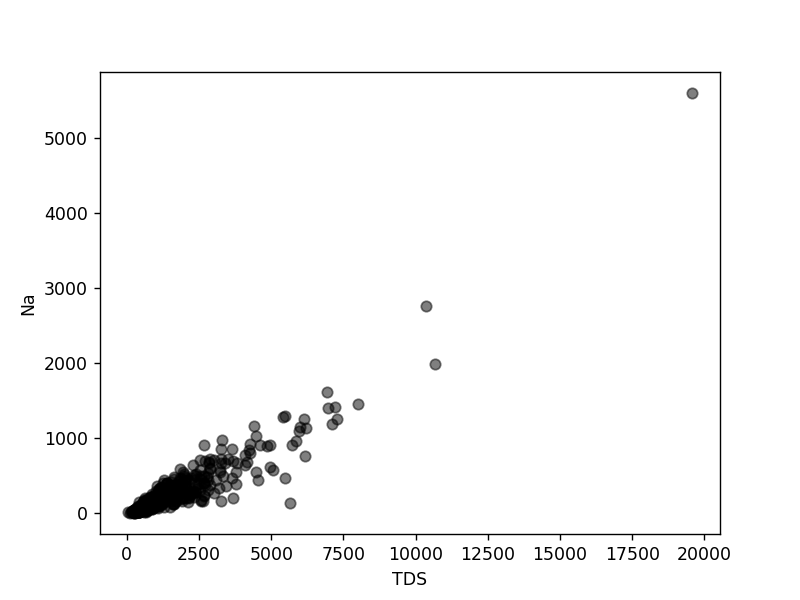

In [115]:
colors = (0,0,0)
plt.scatter(df['TDS'][1:], df['Na'][1:], c=colors, alpha=0.5)
plt.xlabel('TDS')
plt.ylabel('Na')
plt.show()

<IPython.core.display.Javascript object>


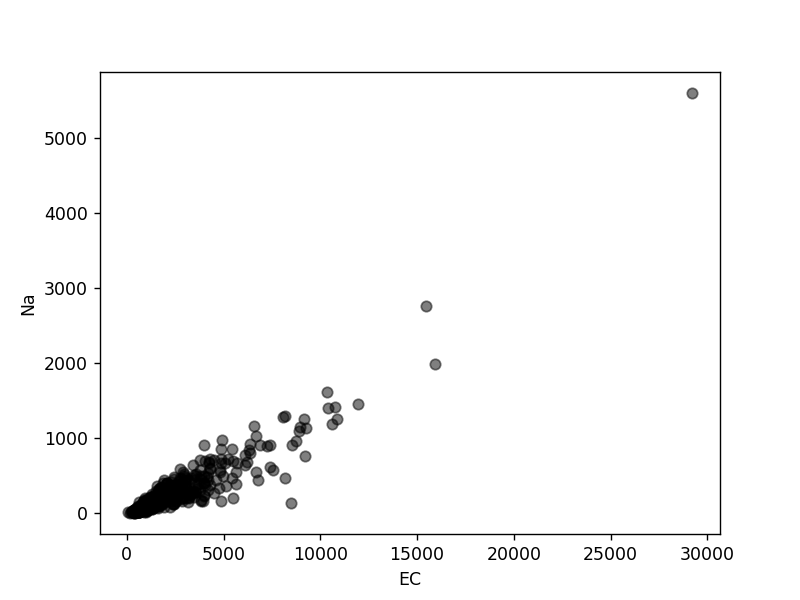

In [116]:
colors = (0,0,0)
plt.scatter(df['EC'][1:], df['Na'][1:], c=colors, alpha=0.5)
plt.xlabel('EC')
plt.ylabel('Na')
plt.show()

<IPython.core.display.Javascript object>


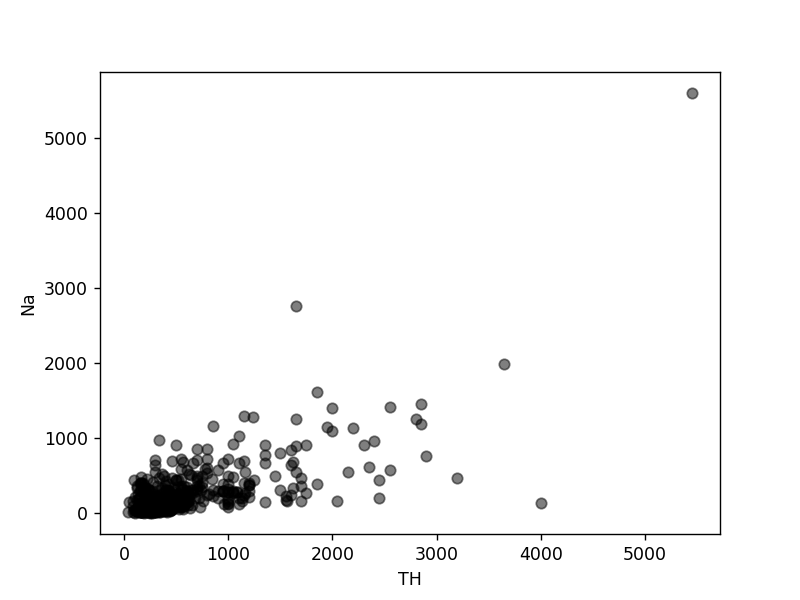

In [117]:
colors = (0,0,0)
plt.scatter(df['TH'][1:], df['Na'][1:], c=colors, alpha=0.5)
plt.xlabel('TH')
plt.ylabel('Na')
plt.show()

<IPython.core.display.Javascript object>


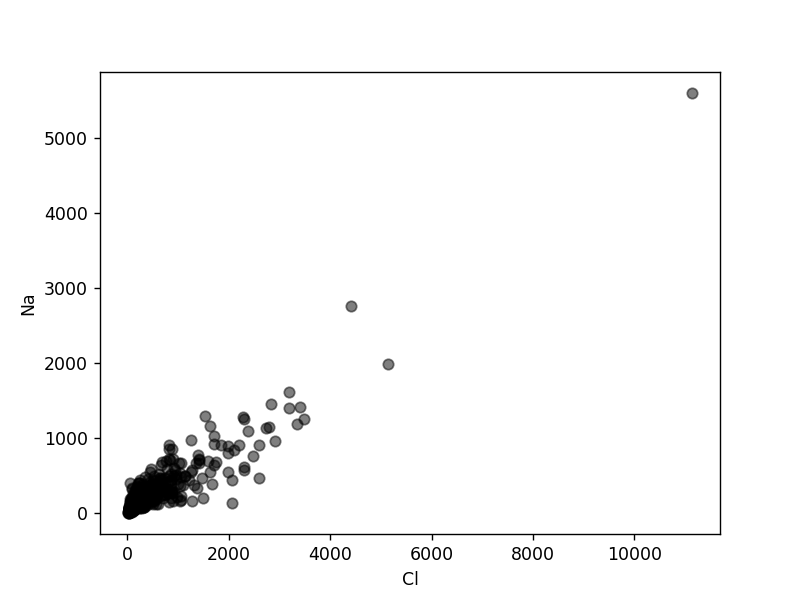

In [118]:
colors = (0,0,0)
plt.scatter(df['Cl'][1:], df['Na'][1:], c=colors, alpha=0.5)
plt.xlabel('Cl')
plt.ylabel('Na')
plt.show()

<IPython.core.display.Javascript object>


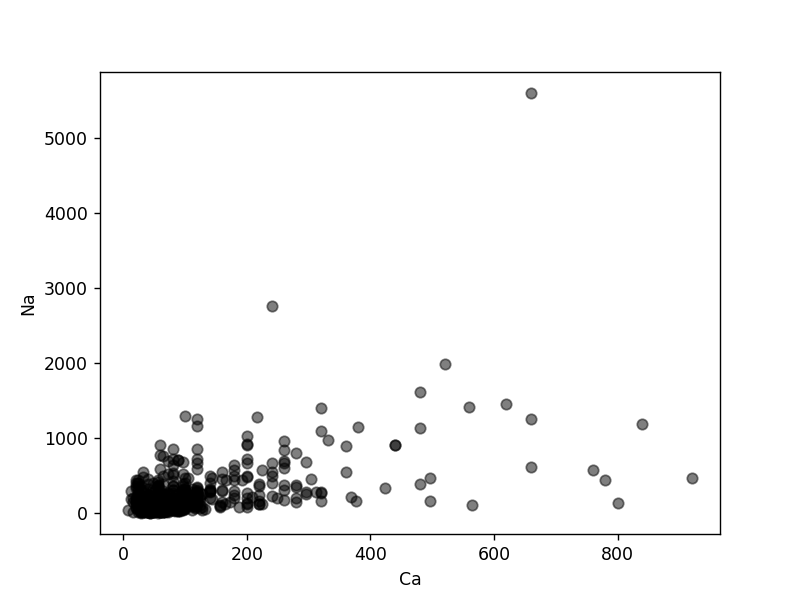

In [119]:
colors = (0,0,0)
plt.scatter(df['Ca'][1:], df['Na'][1:], c=colors, alpha=0.5)
plt.xlabel('Ca')
plt.ylabel('Na')
plt.show()

### End of the model training for all the elements
- From the next section we will build a pipeline to calculate prediction based on the training that we performed earlier.

# <a id='6.'>6. Calculation from the training on the sample data</a>

In [137]:
# Sample input - you can insert your two values below in this cell
pH = 7.40
TDS = 1339.00

In [119]:
pH_sample = ((pH - df['pH'][1:].mean())/df['pH'][1:].std())
TDS_sample = ((TDS - df['TDS'][1:].mean())/df['TDS'][1:].std())
print ("Normalized pH value: {}".format(pH_sample))
print ("Normalized TDS value: {}".format(TDS_sample))

Normalized pH value: -2.776008402854529
Normalized TDS value: -0.03349616276344068


In [120]:
#EC prediction
x_for_EC = np.array([pH_sample, TDS_sample])
x_for_EC = np.reshape(x_for_EC,(1,x_for_EC.shape[0]))
predicted_sample1EC = clf_ridge.predict(x_for_EC)[0][0]
print ("EC mean value: {}".format(permanent_ECmean))
print ("EC standard daviation value: {}".format(permanent_ECstd))
predicted_sampleEC = ((predicted_sample1EC - permanent_ECmean)/permanent_ECstd)
print ("Predicted EC (not normalized) value: {}".format(predicted_sample1EC))
print ("Normalized predicted EC value: {}".format(predicted_sampleEC))

2076.989966555184
2337.5432403341247
Predicted EC (not normalized) value: 2001.3782415241133
Normalized predicted EC value: -0.0323466636793691


In [124]:
#TH prediction
x_for_TH = np.array([pH_sample, TDS_sample, predicted_sampleEC])
x_for_TH = np.reshape(x_for_TH,(1,x_for_TH.shape[0]))
predicted_TH = clf_logistic_TH.predict(x_for_TH)[0]
print ("Predicted TH value: {}".format(predicted_TH))
if predicted_TH == -1.0:
    print ("Predicted TH condition: Below")
elif predicted_TH == 0.0:
    print ("Predicted TH condition: Good")
elif predicted_TH == 1.0:
    print ("Predicted TH condition: Danger")

Predicted TH value: 0.0
Predicted TH condition: Good


In [133]:
#Cl prediction
x_for_CL = np.array([pH_sample, TDS_sample, predicted_sampleEC, predicted_TH])
x_for_CL = np.reshape(x_for_CL,(1,x_for_CL.shape[0]))
predicted_CL = clf_logistic_CL.predict(x_for_CL)[0]
print ("Predicted CL value: {}".format(predicted_CL))
if predicted_CL == -1.0:
    print ("Predicted CL condition: Below")
elif predicted_CL == 0.0:
    print ("Predicted CL condition: Good")
elif predicted_CL == 1.0:
    print ("Predicted CL condition: Danger")

Predicted CL value: 0.0
Predicted CL condition: Good


In [134]:
#Ca prediction
x_for_CA = np.array([pH_sample, TDS_sample, predicted_sampleEC, predicted_TH, predicted_CL])
x_for_CA = np.reshape(x_for_CA,(1,x_for_CA.shape[0]))
predicted_CA = clf_logistic_CA.predict(x_for_CA)[0]
print ("Predicted CA value: {}".format(predicted_CA))
if predicted_CA == -1.0:
    print ("Predicted CA condition: Below")
elif predicted_CA == 0.0:
    print ("Predicted CA condition: Good")
elif predicted_CA == 1.0:
    print ("Predicted CA condition: Danger")

Predicted CA value: 0.0
Predicted CA condition: Good


In [136]:
#Na prediction
x_for_NA = np.array([pH_sample, TDS_sample, predicted_sampleEC, predicted_TH, predicted_CL, predicted_CA])
x_for_NA = np.reshape(x_for_NA,(1,x_for_NA.shape[0]))
predicted_NA = clf_logistic_NA.predict(x_for_NA)[0]
print ("Predicted NA value: {}".format(predicted_NA))
if predicted_NA == -1.0:
    print ("Predicted NA condition: Below")
elif predicted_NA == 0.0:
    print ("Predicted NA condition: Good")
elif predicted_NA == 1.0:
    print ("Predicted NA condition: Danger")

Predicted NA value: 0.0
Predicted NA condition: Good


# <a id='7.'>7. Extra - Correlation plot</a> 

<IPython.core.display.Javascript object>


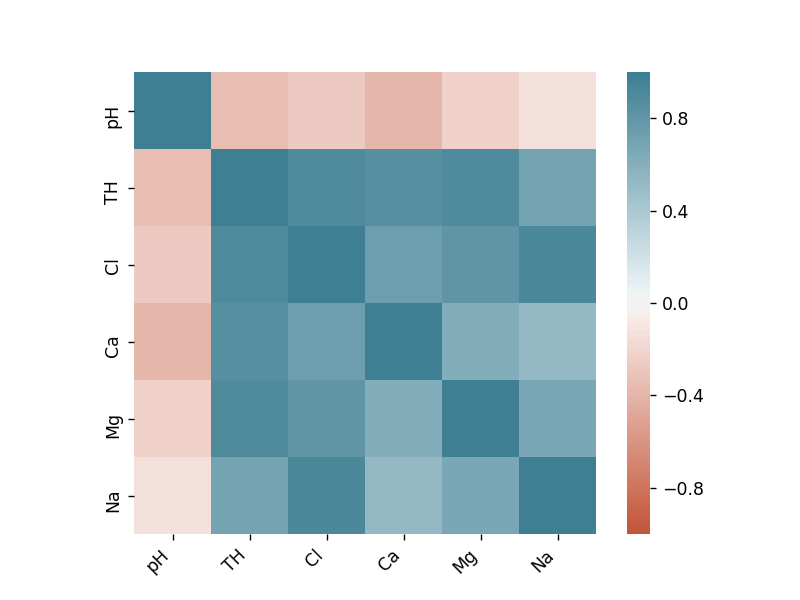

In [145]:
data = pd.concat([df['TDS'][1:],df['pH'][1:], df['TH'][1:], df['Cl'][1:], df['Ca'][1:], df['Mg'][1:], df['Na'][1:]],axis = 1)

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [146]:
corr

,pH,TH,Cl,Ca,Mg,Na
pH,1.000000,-0.339445,-0.258416,-0.397975,-0.221940,-0.124302
TH,-0.339445,1.000000,0.888170,0.866872,0.887996,0.698455
Cl,-0.258416,0.888170,1.000000,0.738069,0.809323,0.927987
Ca,-0.397975,0.866872,0.738069,1.000000,0.620633,0.527640
Mg,-0.221940,0.887996,0.809323,0.620633,1.000000,0.679620
Na,-0.124302,0.698455,0.927987,0.527640,0.679620,1.000000
